In [ ]:
!pip install  transformers==4.37 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
ERROR: pip's dependency resolver does not currently take into account all the packages that

### Data Preparation


In [3]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset
from google.colab import drive
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/Dataset/corpus_tagged.csv', delimiter=',')

In [5]:
percentages = df['TAG'].value_counts(normalize=True) * 100
percentages

,proportion
TAG,
POSITIVO,34.784199
NEUTRO,28.895391
NEGATIVO,25.640088
IRONÍA,10.680322


In [6]:
df_2 = pd.read_excel('/NewDataset_IronyDetection_GPT.xlsx')

In [ ]:
print(df['text'][0])

caro al pudor y grato a la inocencia.  que llora el alba asi suaves corren por el tierno boton de la aromada sin que la manchen con senal ninguna  agita a la violeta embravecido, a la inocente jilma en ese instante, con no menos furor ¡ay! le agitaba el tierno corazon su dura pena .  amor que nunca duerme y siempre busca ocasion de mirar el dueno amado.  hizo a zuinctheba en cierta vez seguirla a prudente distancia y que en el bosque entre el follaje oculto la espiara.  alli advirtio esa tarde la tristeza y la afliccion de jilma.  alli ¡infelice! lo abrasaron los celos, y de entonces jamas tranquilo se encontro un instante.  mas el su angustia y su cruel tormento oculto largo espacio, hasta que un dia de su penar el escondido origen .  dime, jilma preciosa, ¿ no me adoras? triste la pregunto con voz turbada ,estrechando en sus manos varoniles la delicada de su virgen duena ¿ di, no me amas? prosiguio¿ya fincas en otro amor tus castas ilusiones .  ¿ no te amo con delirio, no te adoro? e

In [ ]:
df.sample(4)

,Unnamed: 0,id,file,year,newspaper,city,TAG,text
509,597,97110,/content/drive/MyDrive/19th_century_Latam_News...,1869,El diario de Cundinamarca,Bogotá,NEUTRO,"bryts de gc ley 96 do 1800, pobre riformas civ..."
2274,3569,110863,/content/drive/MyDrive/19th_century_Latam_News...,1888,El correo liberal,Bogotá,POSITIVO,os mucho conocida enerjia i celo del seffor cu...
505,592,115054,/content/drive/MyDrive/19th_century_Latam_News...,1891,El Loro,Panamá,NEUTRO,con mas que hallandose los empresarios ani per...
2376,3679,5991,/content/drive/MyDrive/19th_century_Latam_News...,1890,El zancudo,Santafé de Bogotá,IRONÍA,"dia 20 . canoneo al amanecer, para que sepan ..."


In [8]:
df_2.sample(4)

,Unnamed: 0,text,resp,finish_reason,GPT_ TAG,Human_TAG,Comments
243,NaN,1- -- SE PUBLICA LOS DOMINGOS,'NEUTRO' *El texto simplemente indica que se p...,stop,NEUTRO,Neutro,NaN
276,NaN,Un pueblo a quien se llamase soberano i no fue...,'IRONÍA' *El texto presenta una contradicción ...,stop,IRONÍA,Ironía,Hay dos textos en el fragmento. Del primero sí...
122,NaN,"El 2 de Abril ,- Marcha. - Bernabé Alcalá. III...",'NEUTRO' *El texto no presenta una contradicci...,stop,NEUTRO,Neutro,NaN
910,NaN,2 DESDE LA CUEVA. El candidato de hoy. El text...,'IRONÍA' *El texto presenta una contradicción ...,stop,IRONÍA,Ironía,NaN


In [ ]:
df.describe()

,Unnamed: 0,id,year
count,2734.000000,2734.000000,2734.000000
mean,1324.374543,56927.337966,1884.008413
std,1001.654705,33666.789068,9.759059
min,0.000000,3.000000,1806.000000
25%,417.250000,28763.750000,1881.000000
50%,1205.500000,55567.000000,1881.000000
75%,1985.750000,83816.750000,1890.000000
max,3999.000000,116660.000000,1899.000000


In [9]:
df_old = df[['text', 'TAG']]

In [ ]:
df_old

,text,TAG
0,caro al pudor y grato a la inocencia. que llo...,NEUTRO
1,i aun para que los sacaran tres horas antes de...,NEGATIVO
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA
3,"aparato enganoso de la ficcion, esta la leccio...",POSITIVO
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA
...,...,...
2729,"venga una paz estable y duradera, y el suelo q...",POSITIVO
2730,cada dia nuevas flores en el camino que transi...,POSITIVO
2731,de la respuesta dada por el senor docter velez...,NEGATIVO
2732,"paris, diciembre 11 . el examen de pretara e...",NEGATIVO


In [10]:
df_new = df_2[['text', 'Human_TAG']]
df_new = df_new.rename(columns={'Human_TAG': 'TAG'})

In [11]:
df_new['TAG']=df_new['TAG'].str.upper()
df_new.dropna()

,text,TAG
0,"De antemano el triunfo estaba asegurado, porqu...",NEGATIVO
1,Ultimamente ha resultado que sobre ello nos da...,IRONÍA
2,El gran viajero. Ha puesto a los de su partido...,IRONÍA
3,Es preciso que los señores del gobierno invent...,IRONÍA
4,Lo creo ... Sí ... ) En esto acercose a ellos ...,IRONÍA
...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NEUTRO
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NEUTRO
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA


In [12]:
df_full = pd.concat([df_old, df_new])
df_full

,text,TAG
0,caro al pudor y grato a la inocencia. que llo...,NEUTRO
1,i aun para que los sacaran tres horas antes de...,NEGATIVO
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA
3,"aparato enganoso de la ficcion, esta la leccio...",POSITIVO
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA
...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NEUTRO
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NEUTRO
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA


In [13]:
df_full['TAG'] = df_full['TAG'].str.replace(' ', '', regex = False)
def fem_mas(x):
  if x == 'NEGATIVA':
    return 'NEGATIVO'
  elif x == 'POSITIVA':
    return 'POSITIVO'
  else:
    return x

df_full['TAG'] = df_full['TAG'].apply(fem_mas)
df_full = df_full.loc[df_full['TAG'] != 'ILEGIBLE']
df_full = df_full.dropna()
df_full

,text,TAG
0,caro al pudor y grato a la inocencia. que llo...,NEUTRO
1,i aun para que los sacaran tres horas antes de...,NEGATIVO
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA
3,"aparato enganoso de la ficcion, esta la leccio...",POSITIVO
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA
...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NEUTRO
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NEUTRO
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA


In [ ]:
percentages = df_full['TAG'].value_counts(normalize=True) * 100
percentages

,proportion
TAG,
NEUTRO,29.12
POSITIVO,26.16
IRONÍA,22.40
NEGATIVO,22.32


In [ ]:
def cat_check(x):
  if x == 'IRONÍA':
    return x
  else:
    return 'NO IRONÍA'

df_irony = df_full.copy()
df_irony['TAG'] = df_irony['TAG'].apply(cat_check)

In [ ]:
import pandas as pd

# Convertir 'predictions_written' en una columna categórica
df_full['TAG'] = df_full['TAG'].astype('category')
df_full['predictions_written_cat'] = df_full['TAG'].cat.codes

df_irony['TAG'] = df_irony['TAG'].astype('category')
df_irony['predictions_written_cat'] = df_irony['TAG'].cat.codes


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear el LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna categórica
df_full['category_encoded'] = label_encoder.fit_transform(df_full['TAG'])

# Crear el LabelEncoder para el otro dataset
label_encoder_i = LabelEncoder()

# Ajustar y transformar la columna categórica en el otro dataset
df_irony['category_encoded'] = label_encoder_i.fit_transform(df_irony['TAG'])

In [ ]:
target_names = label_encoder.classes_
print(target_names)
df_full.sample(4)


['IRONÍA' 'NEGATIVO' 'NEUTRO' 'POSITIVO']


,text,TAG,predictions_written_cat,category_encoded
492,"numero ii. 1877. obstaculos, quiere anticipa...",POSITIVO,3,3
2606,cinco anos tendrian mas atractivo y darian mas...,POSITIVO,3,3
936,matrimonio. el distingido joveny amigo nuestr...,NEUTRO,2,2
439,Ya se han hecho insertar en el Diario mismo má...,IRONÍA,0,0


In [ ]:
target_names_i = label_encoder_i.classes_
print(target_names_i)
df_irony.sample(4)


['IRONÍA' 'NO IRONÍA']


,text,TAG,predictions_written_cat,category_encoded
1347,apruebanse y pasense a la sargentia mayor para...,NO IRONÍA,1,1
1316,"el rey, virrey, gobernador, y capitan general ...",NO IRONÍA,1,1
844,colombia iilustrada. prospectojose t. guibro...,NO IRONÍA,1,1
437,tambien algohosbcaptafados por los more3. 5. ...,NO IRONÍA,1,1


In [ ]:
def find_sub_list(sl,l):
    sll=len(sl)
    for ind in (i for i,e in enumerate(l) if e==sl[0]):
        if l[ind:ind+sll]==sl:
            return ind,ind+sll

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from transformers import AutoModel, AutoTokenizer

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA disponible:", torch.cuda.get_device_name(device))
else:
    device = torch.device("cpu")
    print("CUDA no disponible.")



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

###Selección Modelo

In [ ]:
#modelo = "bert-base-uncased"
#modelo = "bert-base-multilingual-uncased"
#modelo = "dccuchile/bert-base-spanish-wwm-uncased"
modelo = "dccuchile/bert-base-spanish-wwm-cased"

In [ ]:
def to_str(x):
  return str(x)

### Testing with BERT models

In [ ]:
# Cargar el tokenizador y modelo BERT
tokenizer = BertTokenizer.from_pretrained(modelo)
model = BertModel.from_pretrained(modelo)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def tokenize_and_get_cls(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Mover los inputs al dispositivo
    outputs = model(**inputs)
    cls_token = outputs.last_hidden_state[:, 0, :].squeeze()
    return cls_token.detach().cpu().numpy()  # Mover el resultado a la CPU y convertir a numpy


df_full['text'] = df_full['text'].apply(to_str)
# Tokenizar todo el texto en el DataFrame y obtener el token CLS
df_full['cls_token'] = df_full['text'].apply(tokenize_and_get_cls)

# Mostrar el DataFrame resultante
df_full

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,text,TAG,predictions_written_cat,category_encoded,cls_token
0,caro al pudor y grato a la inocencia. que llo...,NEUTRO,2,2,"[-0.88137454, -0.08862632, 0.01690963, 0.48355..."
1,i aun para que los sacaran tres horas antes de...,NEGATIVO,1,1,"[-0.67682374, 0.16511574, 0.13929331, 0.001664..."
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA,0,0,"[0.3504997, -0.52670807, -0.42744234, 0.045567..."
3,"aparato enganoso de la ficcion, esta la leccio...",POSITIVO,3,3,"[0.20763257, 0.25387096, 0.1882184, 1.4240305,..."
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA,0,0,"[-0.4339427, -0.11097654, -0.47098455, 0.80024..."
...,...,...,...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NEUTRO,2,2,"[0.25601843, -0.21641555, -0.024631899, -0.029..."
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NEUTRO,2,2,"[-0.4101485, -0.54514414, 0.3785433, 0.9922696..."
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA,0,0,"[-0.23337975, 0.0075801336, 0.51007354, 1.0358..."
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA,0,0,"[0.3980119, -0.016878417, 0.10579191, 1.452409..."


In [ ]:
df_irony['text'] = df_irony['text'].apply(to_str)
# Tokenizar todo el texto en el DataFrame de Ironía y obtener el token CLS
df_irony['cls_token'] = df_irony['text'].apply(tokenize_and_get_cls)

# Mostrar el DataFrame resultante
df_irony

,text,TAG,predictions_written_cat,category_encoded,cls_token
0,caro al pudor y grato a la inocencia. que llo...,NO IRONÍA,1,1,"[-0.88137454, -0.08862632, 0.01690963, 0.48355..."
1,i aun para que los sacaran tres horas antes de...,NO IRONÍA,1,1,"[-0.67682374, 0.16511574, 0.13929331, 0.001664..."
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA,0,0,"[0.3504997, -0.52670807, -0.42744234, 0.045567..."
3,"aparato enganoso de la ficcion, esta la leccio...",NO IRONÍA,1,1,"[0.20763257, 0.25387096, 0.1882184, 1.4240305,..."
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA,0,0,"[-0.4339427, -0.11097654, -0.47098455, 0.80024..."
...,...,...,...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NO IRONÍA,1,1,"[0.25601843, -0.21641555, -0.024631899, -0.029..."
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NO IRONÍA,1,1,"[-0.4101485, -0.54514414, 0.3785433, 0.9922696..."
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA,0,0,"[-0.23337975, 0.0075801336, 0.51007354, 1.0358..."
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA,0,0,"[0.3980119, -0.016878417, 0.10579191, 1.452409..."


### Testing Pretrained Model

In [ ]:
#Tony tokenizer
modelo = "dccuchile/bert-base-spanish-wwm-cased"
tokenizer = AutoTokenizer.from_pretrained(modelo)
model = torch.load(f"Models/latam-old-spanish-beto-cased.pt")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
<ipython-input-160-dc4e75a2fd8c>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def tokenize_and_get_cls(text):
    inp = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
      input_ids = inp["input_ids"].to(device)
      attention_mask = inp["attention_mask"].to(device)
      outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
    cls_token = outputs.hidden_states[-1][:, 0, :].squeeze()
    return cls_token.detach().cpu().numpy()  # Mover el resultado a la CPU y convertir a numpy

df_full['text'] = df_full['text'].apply(to_str)
# Tokenizar todo el texto en el DataFrame y obtener el token CLS
df_full['cls_token'] = df_full['text'].apply(tokenize_and_get_cls)

# Mostrar el DataFrame resultante
df_full

,text,TAG,predictions_written_cat,category_encoded,cls_token
0,caro al pudor y grato a la inocencia. que llo...,NEUTRO,2,2,"[-1.3150538, 0.38609308, -0.5832689, 1.258404,..."
1,i aun para que los sacaran tres horas antes de...,NEGATIVO,1,1,"[-0.80239785, 0.69602597, -0.3853709, 1.162471..."
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA,0,0,"[-0.028395412, 0.56839854, -0.7873627, 1.08344..."
3,"aparato enganoso de la ficcion, esta la leccio...",POSITIVO,3,3,"[-0.40707815, 0.4897185, -0.37883076, 1.947516..."
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA,0,0,"[-0.14947344, 0.708439, -0.7302818, 1.9114951,..."
...,...,...,...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NEUTRO,2,2,"[0.052854586, 0.5544079, -0.7754671, 1.5102977..."
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NEUTRO,2,2,"[-0.94778174, -0.22467528, -0.504273, 0.938647..."
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA,0,0,"[-0.4119697, 0.36738452, -0.28014454, 1.650402..."
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA,0,0,"[-0.13904326, 0.034214113, -0.3748217, 1.82250..."


In [ ]:
df_irony['text'] = df_irony['text'].apply(to_str)
# Tokenizar todo el texto en el DataFrame de Ironía y obtener el token CLS
df_irony['cls_token'] = df_irony['text'].apply(tokenize_and_get_cls)

# Mostrar el DataFrame resultante
df_irony

,text,TAG,predictions_written_cat,category_encoded,cls_token
0,caro al pudor y grato a la inocencia. que llo...,NO IRONÍA,1,1,"[-1.1760741, 0.16675165, -0.764597, 1.419284, ..."
1,i aun para que los sacaran tres horas antes de...,NO IRONÍA,1,1,"[-0.834228, 0.9190981, -0.494189, 1.0412017, -..."
2,"habla de noventa y nueve anos, y noventa y nue...",IRONÍA,0,0,"[0.25039756, 0.43973067, -0.40142575, 1.409992..."
3,"aparato enganoso de la ficcion, esta la leccio...",NO IRONÍA,1,1,"[-0.16609001, 0.63324803, -0.60610086, 1.81958..."
4,soldado . infeliz ! esta que revienta por ir ...,IRONÍA,0,0,"[-0.7432103, 0.43783444, -0.8480728, 1.9073274..."
...,...,...,...,...,...
1032,"Buenos Aires de mis ojos, I s ojos de mi alma,...",NO IRONÍA,1,1,"[0.25426027, 0.28452092, -0.97556585, 1.574741..."
1033,EL BAILE DE LOS OSOS (CANTO DE LOS GITANOS) Co...,NO IRONÍA,1,1,"[-0.8259153, -0.2913403, -0.31743884, 1.794267..."
1034,A. U. i C. U. que creen asemejarse a la plebe ...,IRONÍA,0,0,"[-0.058939885, 0.5422229, -0.6927442, 1.083394..."
1035,"opinion no es nadie, el gobernador es todo atr...",IRONÍA,0,0,"[-0.019184597, 0.29048234, -0.21493617, 1.8106..."


### Multiclass Training

In [ ]:
# Separar las características (CLS tokens) y las etiquetas (predicciones categóricas)
X = torch.tensor(df_full['cls_token'].tolist())
y = torch.tensor(df_full['category_encoded'].tolist())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Define the neural network
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hiperparámetros
input_dim = 768  # Tamaño de los vectores CLS
hidden_dim = 50
output_dim = len(target_names)  # Número de clases
learning_rate = 0.001
num_epochs = 1500
patience = 10

# Crear el modelo, la función de pérdida y el optimizador
model = SentimentClassifier(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Registramos las pérdidas
train_losses = []
val_losses = []

# Se establecen puntos de recuperación y se detiene el entrenamiento tempranamente
best_val_loss = np.inf
epochs_no_improve = 0
best_model_state = None
model_save_path = f'Models/All-spanish-old-SAA.pth'

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train.float())
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Se evalua con validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val.float())
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

    # Revisa mejoras en la pérdida de validación
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        epochs_no_improve = 0
        print("Validation loss improved, saving model...")
        torch.save(model.state_dict(), model_save_path)
    else:
        epochs_no_improve += 1

    # Se detiene el entrenamiento
    if epochs_no_improve >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

# Carga el mejor modelo
if best_model_state:
    model.load_state_dict(best_model_state)


Epoch 1/1500, Loss: 1.4127882719039917, Val Loss: 1.3667680025100708
Validation loss improved, saving model...
Epoch 2/1500, Loss: 1.377882480621338, Val Loss: 1.3352023363113403
Validation loss improved, saving model...
Epoch 3/1500, Loss: 1.3514630794525146, Val Loss: 1.310953974723816
Validation loss improved, saving model...
Epoch 4/1500, Loss: 1.3199927806854248, Val Loss: 1.2928985357284546
Validation loss improved, saving model...
Epoch 5/1500, Loss: 1.2925525903701782, Val Loss: 1.2724144458770752
Validation loss improved, saving model...
Epoch 6/1500, Loss: 1.2656729221343994, Val Loss: 1.2456071376800537
Validation loss improved, saving model...
Epoch 7/1500, Loss: 1.2371324300765991, Val Loss: 1.2162567377090454
Validation loss improved, saving model...
Epoch 8/1500, Loss: 1.2089753150939941, Val Loss: 1.189581274986267
Validation loss improved, saving model...
Epoch 9/1500, Loss: 1.1823093891143799, Val Loss: 1.166097640991211
Validation loss improved, saving model...
Epoch

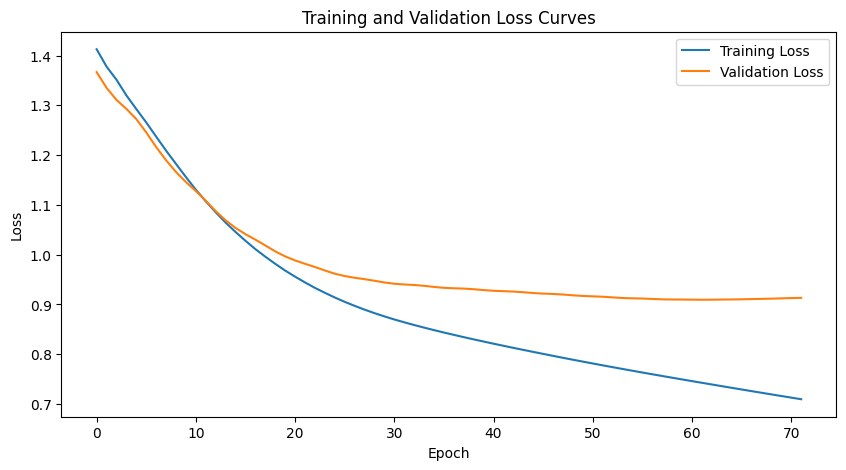

In [ ]:
# Graficar las curvas de pérdida
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.show()

In [ ]:
# Evaluar el modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    outputs = model(X_test.float())
    _, predicted = torch.max(outputs, 1)

    accuracy = accuracy_score(y_test, predicted)
    report = classification_report(y_test, predicted, target_names=target_names)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6145648312611013
Classification Report:
              precision    recall  f1-score   support

      IRONÍA       0.70      0.66      0.68       117
    NEGATIVO       0.50      0.55      0.52       119
      NEUTRO       0.64      0.64      0.64       169
    POSITIVO       0.62      0.60      0.61       158

    accuracy                           0.61       563
   macro avg       0.62      0.61      0.61       563
weighted avg       0.62      0.61      0.62       563



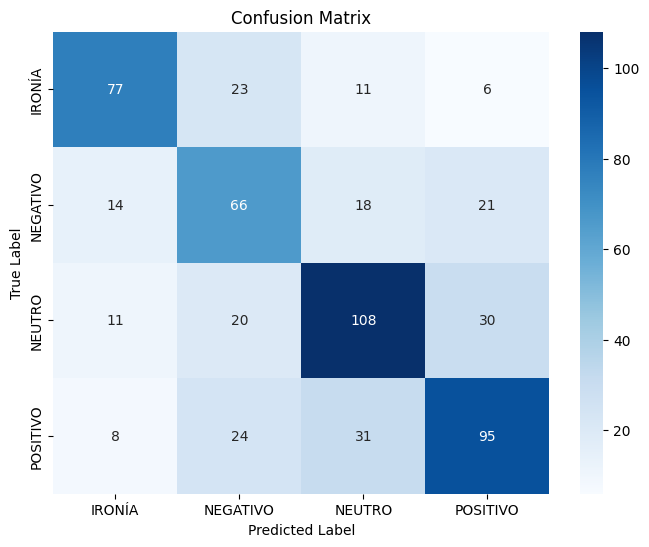

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Binary Testing

In [ ]:
# Separar las características (CLS tokens) y las etiquetas (predicciones categóricas)
X = torch.tensor(df_irony['cls_token'].tolist())
y = torch.tensor(df_irony['category_encoded'].tolist())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Define la red neuronal
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hiperparámetros
input_dim = 768  # Tamaño de los vectores CLS
hidden_dim = 50
output_dim = len(target_names_i)  # Número de clases
learning_rate = 0.001
num_epochs = 1500
patience = 100
epochs_no_improve = 0

# Crear el modelo, la función de pérdida y el optimizador
model = SentimentClassifier(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model_save_path = f'Models/Binary-spanish-old-SAA.pth'

# Registramos las pérdidas
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train.float())
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Se evalua con validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val.float())
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

    # Revisa mejoras en la pérdida de validación
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        epochs_no_improve = 0
        print("Validation loss improved, saving model...")
        torch.save(model.state_dict(), model_save_path)
    else:
        epochs_no_improve += 1

    # Se detiene el entrenamiento
    if epochs_no_improve >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

# Carga el mejor modelo
if best_model_state:
    model.load_state_dict(best_model_state)


Epoch 1/1500, Loss: 0.7771843075752258, Val Loss: 0.5984464287757874
Validation loss improved, saving model...
Epoch 2/1500, Loss: 0.6053846478462219, Val Loss: 0.5250442624092102
Validation loss improved, saving model...
Epoch 3/1500, Loss: 0.5396928191184998, Val Loss: 0.5176084041595459
Validation loss improved, saving model...
Epoch 4/1500, Loss: 0.5380226969718933, Val Loss: 0.5289969444274902
Epoch 5/1500, Loss: 0.5520898103713989, Val Loss: 0.531044065952301
Epoch 6/1500, Loss: 0.5542858242988586, Val Loss: 0.5223357081413269
Epoch 7/1500, Loss: 0.5442759990692139, Val Loss: 0.5082207918167114
Validation loss improved, saving model...
Epoch 8/1500, Loss: 0.5280876755714417, Val Loss: 0.49363207817077637
Validation loss improved, saving model...
Epoch 9/1500, Loss: 0.5112161636352539, Val Loss: 0.48243892192840576
Validation loss improved, saving model...
Epoch 10/1500, Loss: 0.49783816933631897, Val Loss: 0.4761962294578552
Validation loss improved, saving model...
Epoch 11/1500

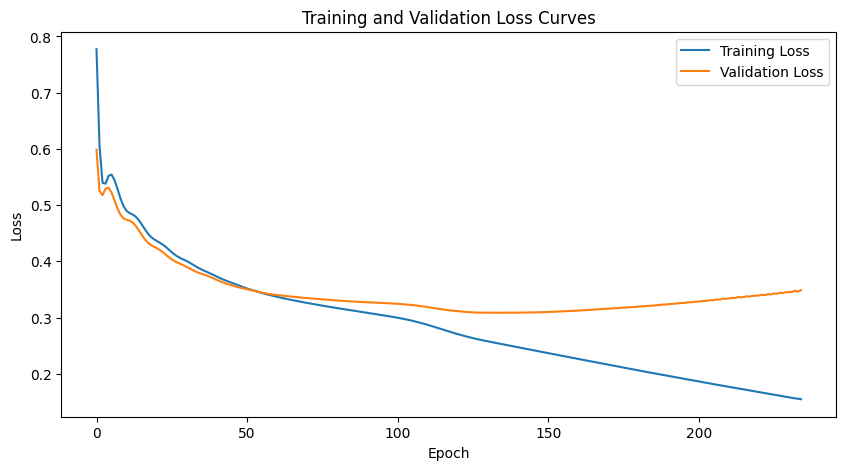

In [ ]:
# Graficar las curvas de pérdida
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.show()

In [ ]:
# Evaluar el modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    outputs = model(X_test.float())
    _, predicted = torch.max(outputs, 1)

    accuracy = accuracy_score(y_test, predicted)
    report = classification_report(y_test, predicted, target_names=target_names_i)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8650088809946714
Classification Report:
              precision    recall  f1-score   support

      IRONÍA       0.68      0.67      0.67       117
   NO IRONÍA       0.91      0.92      0.91       446

    accuracy                           0.87       563
   macro avg       0.80      0.79      0.79       563
weighted avg       0.86      0.87      0.86       563



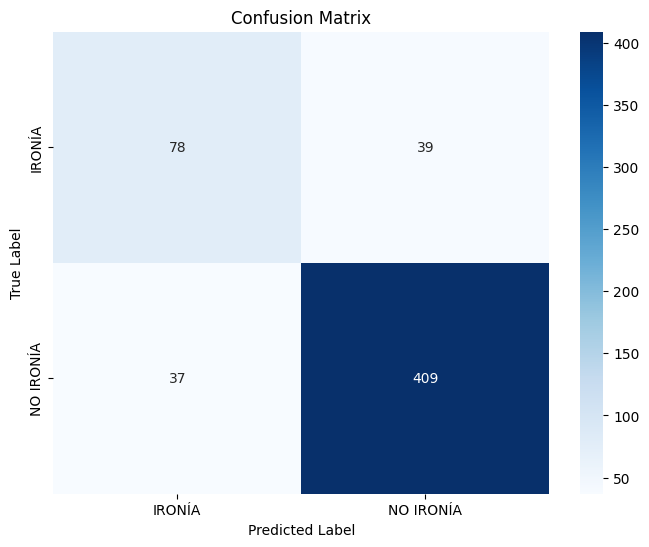

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_i.classes_, yticklabels=label_encoder_i.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Load a Model

In [ ]:
model_path_load = ""
model = SentimentClassifier(input_dim, hidden_dim, output_dim)

# Cargar el modelo
model.load_state_dict(torch.load(model_path_load))